In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [294]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

x = df.drop(columns='stroke')
y = df['stroke']

x.shape , y.shape

((5110, 11), (5110,))

<Axes: >

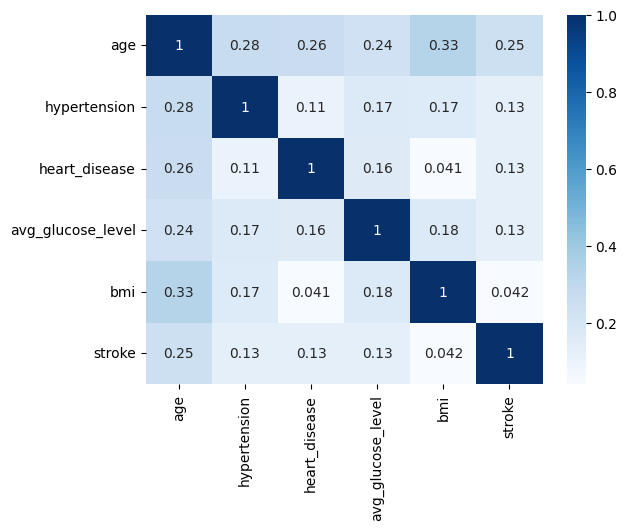

In [295]:
cor_data = df[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']].corr()

sns.heatmap(cor_data,annot=True,cmap='Blues')

<Axes: xlabel='gender'>

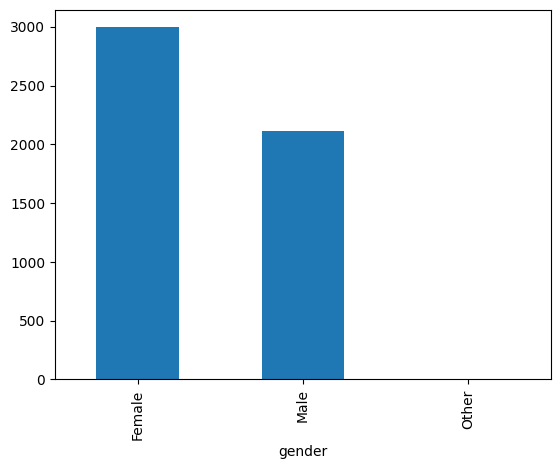

In [296]:
x.gender.value_counts().plot(kind='bar')

<Axes: xlabel='hypertension'>

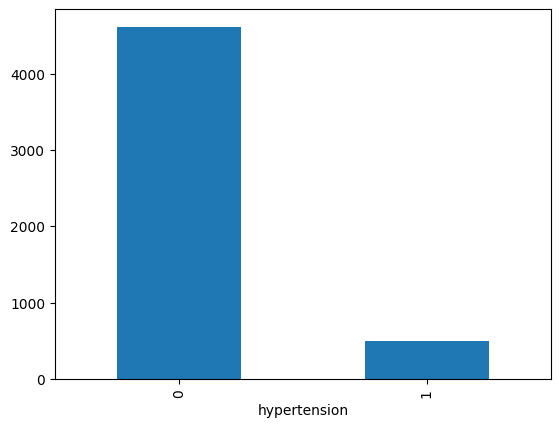

In [297]:
x.hypertension.value_counts().plot(kind='bar')

<Axes: xlabel='heart_disease'>

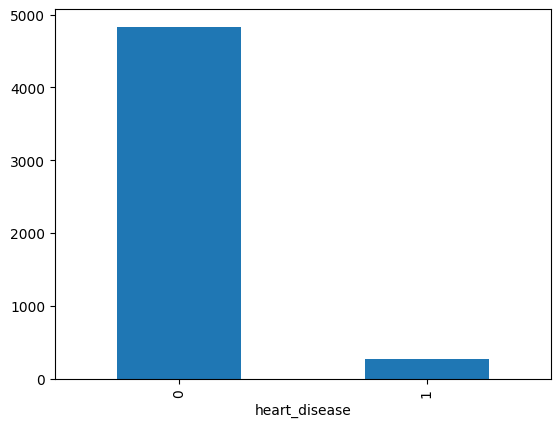

In [298]:
x.heart_disease.value_counts().plot(kind='bar')

<Axes: xlabel='work_type'>

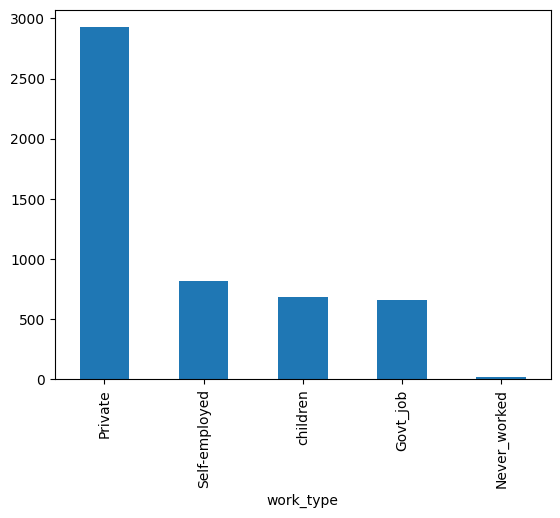

In [299]:
x.work_type.value_counts().plot(kind='bar')

<Axes: xlabel='Residence_type'>

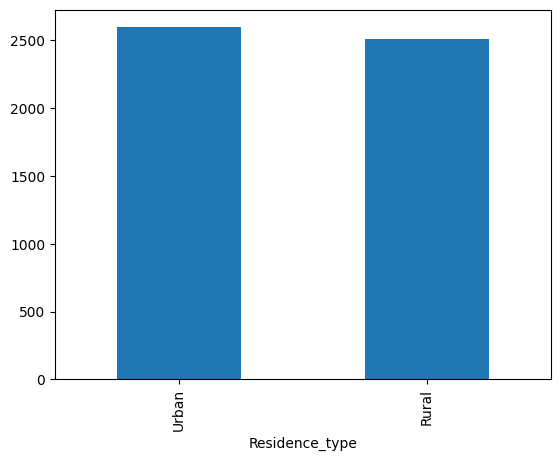

In [300]:
x.Residence_type.value_counts().plot(kind='bar')

<Axes: xlabel='smoking_status'>

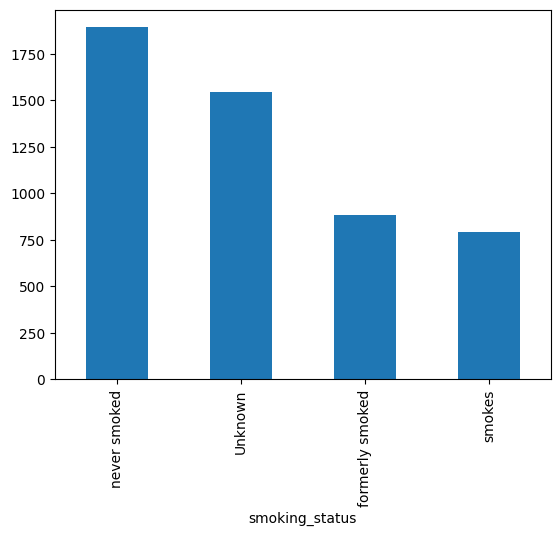

In [301]:
x.smoking_status.value_counts().plot(kind='bar')

In [340]:
x.drop(columns='id',inplace=True)

In [341]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

x_train.shape , x_test.shape,y_train.shape,y_test.shape

((4088, 10), (1022, 10), (4088,), (1022,))

In [342]:
x_train.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  157
smoking_status         0
dtype: int64

In [343]:
cat_var = x_train.select_dtypes(include=['object']).keys()
cat_var

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [344]:
cat_col_lst = []
for i in cat_var:
    cat_col_lst.append(x_train.columns.get_loc(i))

cat_col_lst , cat_var

([0, 4, 5, 6, 9],
 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
        'smoking_status'],
       dtype='object'))

In [345]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4555,Female,22.0,0,0,No,Private,Rural,102.00,40.4,smokes
1647,Female,6.0,0,0,No,children,Urban,78.26,19.4,Unknown
3843,Female,35.0,0,0,Yes,Private,Urban,86.97,25.7,Unknown
3047,Female,22.0,0,0,No,Private,Urban,62.52,38.2,never smoked
4486,Male,14.0,0,0,No,Private,Urban,126.57,25.9,formerly smoked


In [346]:
x_train.columns.get_loc('bmi')

8

In [347]:
step_1 = ColumnTransformer(
    [
        ('bmi_mean',SimpleImputer(),[8])
    ],remainder='passthrough'
)

In [348]:
step_2 = ColumnTransformer(
    [
        ('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),cat_col_lst)
    ]
)

In [349]:
step_3 = StandardScaler()

In [350]:
pipe = Pipeline([
    ('step_1',step_1),
    ('step_2',step_2),
    ('step_3',step_3),
])

In [351]:
print(pipe)


Pipeline(steps=[('step_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('bmi_mean', SimpleImputer(),
                                                  [8])])),
                ('step_2',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4, 5, 6, 9])])),
                ('step_3', StandardScaler())])


In [352]:
pipe.fit(x_train)

Pipeline(steps=[('step_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('bmi_mean', SimpleImputer(),
                                                  [8])])),
                ('step_2',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4, 5, 6, 9])])),
                ('step_3', StandardScaler())])

In [353]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100)

In [354]:
x_train_trans = pipe.transform(x_train)
x_test_trans = pipe.transform(x_test)

In [355]:
model=rfclf.fit(x_train_trans,y_train)

In [376]:
rfclf.predict(x_test_trans)[170:180] , y_test[170:200]

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 1367    0
 2773    0
 3070    0
 623     0
 4192    0
 1679    0
 778     0
 4542    0
 1376    0
 201     1
 4940    0
 3979    0
 2496    0
 4848    0
 269     0
 3693    0
 1586    0
 880     0
 850     0
 4141    0
 3098    0
 1254    0
 2558    0
 2922    0
 3572    0
 4496    0
 171     1
 1556    0
 3384    0
 678     0
 Name: stroke, dtype: int64)

In [357]:
model.predict(x_test_trans)

array([0, 0, 0, ..., 0, 0, 0], shape=(1022,))

In [378]:
rfclf.score(x_test_trans,y_test)

0.9481409001956947

In [359]:
import pickle

pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(x_train,open('df.pkl','wb'))

In [377]:
x_test.iloc[173]

gender                Female
age                     74.0
hypertension               0
heart_disease              0
ever_married             Yes
work_type            Private
Residence_type         Rural
avg_glucose_level      68.34
bmi                     39.3
smoking_status       Unknown
Name: 623, dtype: object